1. Require Libraries

In [8]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

2. Load Dataset

We use the sample user behaviors to do exploratory data analysis. 

In [9]:
df = pd.read_csv("Sampled_UserBehavior.csv")

In [10]:
column_names = ['User_ID', 'Item_ID', 'Categorical_ID','Behavior','Timestamp']
df = pd.read_csv("Sampled_UserBehavior.csv", header=0, names=column_names)
df.head()

,User_ID,Item_ID,Categorical_ID,Behavior,Timestamp
1792,1000061,1288773,1735195,pv,1511576626
1793,1000061,4074215,4684862,pv,1511677113
1794,1000061,1120968,512076,pv,1511685194
1795,1000061,4862918,3164550,cart,1511686985
1796,1000061,3150019,3164550,cart,1511687015


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998586 entries, 1792 to 100148375
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   User_ID         998586 non-null  int64 
 1   Item_ID         998586 non-null  int64 
 2   Categorical_ID  998586 non-null  int64 
 3   Behavior        998586 non-null  object
 4   Timestamp       998586 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 45.7+ MB


3. Check Data Integrity

1) We first check if there exists any duplicated rows.

In [12]:
duplicate_rows = df[df.duplicated()]
duplicate_rows_count = duplicate_rows.shape[0]

In [13]:
print(duplicate_rows)
print("Number of duplicated rows:", duplicate_rows_count)

Empty DataFrame
Columns: [User_ID, Item_ID, Categorical_ID, Behavior, Timestamp]
Index: []
Number of duplicated rows: 0


There is no duplicate rows. 

Check whether there are any duplicated columns.

2) Then, we check whether there are any missing values in the dataset. 

In [18]:
df.isnull().sum()

User_ID           0
Item_ID           0
Categorical_ID    0
Behavior          0
Timestamp         0
dtype: int64

There is no missing value in this dataset. 

4.Timestamp to Date

We convert the Timestamp to a time unit -- Date.

In [19]:
df['Date'] = pd.to_datetime(df['Timestamp'], unit='s').dt.date

In [20]:
# Print the count of each unique date
print(df["Date"].value_counts())

2017-12-02    139670
2017-12-03    122451
2017-12-01    112001
2017-11-26    105262
2017-11-30    105068
2017-11-25    102365
2017-11-29    100395
2017-11-28     99709
2017-11-27     99069
2017-11-24     12447
2017-11-23        62
2017-11-18        25
2017-11-22        17
2019-11-01        14
2017-11-16         5
2017-11-19         5
2017-11-21         4
2017-11-11         3
2017-11-12         2
2017-11-14         2
2017-11-20         2
2017-10-21         2
2017-10-29         1
2017-11-10         1
2017-11-15         1
2017-11-13         1
2017-11-02         1
2017-11-05         1
Name: Date, dtype: int64


In [21]:
# Filter the DataFrame for the specific date range
cleaned_df = df[(df["Date"] >= pd.to_datetime('2017-11-25').date()) & (df["Date"] <= pd.to_datetime('2017-12-03').date())]

# Print the count of each unique date in the filtered DataFrame
print(cleaned_df["Date"].value_counts())

2017-12-02    139670
2017-12-03    122451
2017-12-01    112001
2017-11-26    105262
2017-11-30    105068
2017-11-25    102365
2017-11-29    100395
2017-11-28     99709
2017-11-27     99069
Name: Date, dtype: int64


5. Check the dimensions of the data.

In [22]:
df = cleaned_df

In [23]:
np.shape(df)

(985990, 6)

6. Check the number of unique values of each column in the dataset. 

In [24]:
unique_counts = df.nunique()

In [25]:
unique_counts

User_ID             9820
Item_ID           396855
Categorical_ID      5843
Behavior               4
Timestamp         488038
Date                   9
dtype: int64

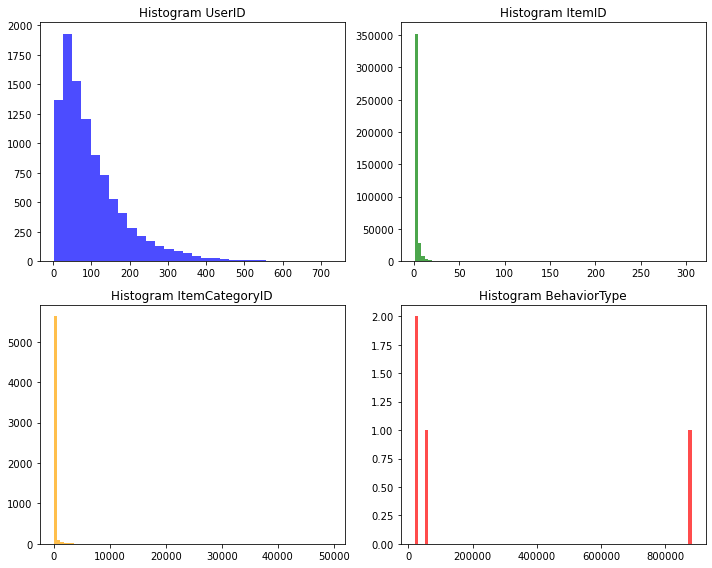

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot histograms of counts of unique values for each column
axs[0, 0].hist(df["User_ID"].value_counts(), bins=30, color='blue', alpha=0.7)
axs[0, 0].set_title('Histogram UserID')

axs[0, 1].hist(df["Item_ID"].value_counts(), bins=80, color='green', alpha=0.7)
axs[0, 1].set_title('Histogram ItemID')

axs[1, 0].hist(df["Categorical_ID"].value_counts(), bins=80, color='orange', alpha=0.7)
axs[1, 0].set_title('Histogram ItemCategoryID')

axs[1, 1].hist(df["Behavior"].value_counts(), bins=80, color='red', alpha=0.7)
axs[1, 1].set_title('Histogram BehaviorType')

plt.tight_layout()

7. Check the number of different types of behaviors.

In [29]:
from collections import Counter
print(Counter(df['Behavior']))

Counter({'pv': 882949, 'cart': 55229, 'fav': 28407, 'buy': 19405})


The dataset contains all behaviors(including Page Views, Cart, Favorite, Purchases) of 9840 random users who were active between November 25, 2017, and December 3, 2017. Each row in the dataset represents a single user action and consist of the User ID, Item ID, Category ID, Behavior, and Timestamp. 

8. Check the number of different behaviors in each date.

In [30]:
df['Behavior1']=df['Behavior'].map({'pv':1,'cart':2,'fav':3,'buy':4})
df['Behavior1']=df['Behavior1'].apply(lambda x: list(str(x)))
a = df.groupby('Date')['Behavior1'].sum()
a = pd.DataFrame(a)
a

,Behavior1
Date,
2017-11-25,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2017-11-26,"[1, 1, 2, 2, 4, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, ..."
2017-11-27,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, ..."
2017-11-28,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, ..."
2017-11-29,"[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2017-11-30,"[2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 4, 1, 1, ..."
2017-12-01,"[2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, ..."
2017-12-02,"[1, 1, 2, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, ..."
2017-12-03,"[1, 4, 1, 1, 2, 1, 1, 1, 4, 1, 1, 2, 2, 2, 1, ..."


In [31]:
print(Counter(a['Behavior1'].iloc[0]))

Counter({'1': 91771, '2': 5638, '3': 2963, '4': 1993})


In [32]:
#获取'pv','fav','cart','buy'数据
item = pd.DataFrame(columns=['pv','fav','cart','buy'],index=['12/1','12/2','12/3','11/25','11/26','11/27','11/28','11/29','11/30'])
for i in range(9):
    x = Counter(a['Behavior1'].iloc[i])
    it = list(x.values())
    item.iloc[i] = it
        
item

,pv,fav,cart,buy
12/1,91771,5638,2963,1993
12/2,94233,5941,2106,2982
12/3,88740,5389,2054,2886
11/25,89174,5443,2165,2927
11/26,90110,5333,2022,2930
11/27,5733,94046,2187,3102
11/28,6601,100329,2086,2985
11/29,124759,8163,2506,4242
11/30,109787,2286,6988,3390


In [37]:
df_drop = df.drop(["Timestamp", "Date","Behavior1"],axis=1)
duplicate_rows_drop = df_drop[df_drop.duplicated()]
duplicate_rows_count_drop = duplicate_rows_drop.shape[0]
print("Total number of rows:", df_drop.shape[0])
print("Number of user-item pairs with duplicated behaviors:", duplicate_rows_count_drop)

Total number of rows: 985990
Number of rows of with user-item pair duplicated behaviors: 187412


In [38]:
from collections import Counter
print(Counter(duplicate_rows_drop['Behavior']))

Counter({'pv': 185030, 'cart': 1429, 'buy': 807, 'fav': 146})


Customers are likely to click on an item multiples times.

In [39]:
# Counting the frequency of each duplicate row
frequency = duplicate_rows_drop.groupby(list(df_drop.columns)).size()

# Getting the maximum number of duplicates
max_duplicates = frequency.max()

print("Maximum number of user-item pair duplicate behaviors:", max_duplicates)

Maximum number of user-item pair duplicate behaviors: 129
